# I - Préparation de données

## 0-Téléchargement de données

In [1]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 11.0/11.0 MB 96.0 MB/s  0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 12.8/12.8 MB 179.2 MB/s  0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   ---------

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

## 1- Informations sur les données

In [3]:
X = mnist.keys()
print("Clés disponibles dans le dataset MNIST:")
print(list(X))

Clés disponibles dans le dataset MNIST:
['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']


In [4]:
import numpy as np

# a. Stocker les données dans la variable X
X = mnist.data
print("a. Variable X créée avec les données")

# b. Afficher la taille des données (nombre de features et taille de chaque feature)
print(f"b. Taille des données X: {X.shape}")
print(f"   - Nombre d'échantillons: {X.shape[0]}")
print(f"   - Nombre de features par échantillon: {X.shape[1]}")

# c. Stocker les classes dans la variable Y
Y = mnist.target
print("\nc. Variable Y créée avec les classes")

# d. Afficher la taille des labels/classes
print(f"d. Taille des labels Y: {Y.shape}")
print(f"   - Nombre total de labels: {Y.shape[0]}")

# e. Afficher les différentes classes de la base de données
classes_uniques = np.unique(Y)
print(f"\ne. Classes uniques dans la base de données: {classes_uniques}")
print(f"   - Nombre de classes différentes: {len(classes_uniques)}")

# f. Description détaillée de la base de données
print("\nf. Description détaillée de la base de données:")
print(mnist.DESCR)

a. Variable X créée avec les données
b. Taille des données X: (70000, 784)
   - Nombre d'échantillons: 70000
   - Nombre de features par échantillon: 784

c. Variable Y créée avec les classes
d. Taille des labels Y: (70000,)
   - Nombre total de labels: 70000

e. Classes uniques dans la base de données: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
   - Nombre de classes différentes: 10

f. Description détaillée de la base de données:
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learni

=== Analyse de la première instance de MNIST ===

a. Affichage de la première instance:
   i. Première instance extraite avec X.values[0]
      Forme originale: (784,)
   ii. Image redimensionnée en 28x28: (28, 28)


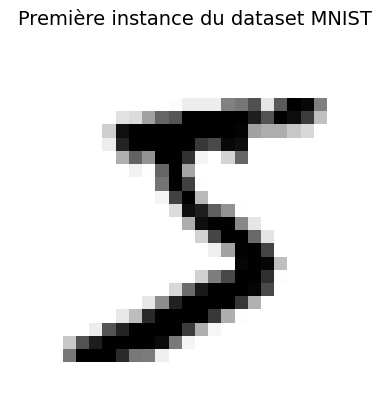

   iii. Image affichée en niveau de gris
        Valeurs min/max des pixels: 0.0 à 255.0

b. Analyse de la première instance:
   - Classe de la première instance: 5
   - Type de la classe: <class 'str'>
   - Type de l'instance (données): <class 'numpy.ndarray'>

=== Conclusion ===
La première image du dataset MNIST représente le chiffre: 5


In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

print("=== Analyse de la première instance de MNIST ===\n")

# a. Affichage de la première instance de la base de données
print("a. Affichage de la première instance:")

# i. Utiliser l'attribut "values" du dictionnaire X
premiere_instance = X.values[0]
print(f"   i. Première instance extraite avec X.values[0]")
print(f"      Forme originale: {premiere_instance.shape}")

# ii. Redimensionner via la fonction "reshape" de numpy en taille 28,28
image_2d = premiere_instance.reshape(28, 28)
print(f"   ii. Image redimensionnée en 28x28: {image_2d.shape}")

# iii. Utiliser imshow avec cmap=mpl.cm.binary pour affichage en niveau de gris
plt.figure()
plt.imshow(image_2d, cmap=mpl.cm.binary)
plt.title("Première instance du dataset MNIST", fontsize=14)
plt.axis('off')  # Supprimer les axes pour une meilleure visualisation
plt.show()

print(f"   iii. Image affichée en niveau de gris")
print(f"        Valeurs min/max des pixels: {premiere_instance.min():.1f} à {premiere_instance.max():.1f}")

# b. Afficher la classe et le type de la première instance
print(f"\nb. Analyse de la première instance:")
classe_premiere = Y.iloc[0]  # Utiliser iloc pour pandas Series
print(f"   - Classe de la première instance: {classe_premiere}")
print(f"   - Type de la classe: {type(classe_premiere)}")
print(f"   - Type de l'instance (données): {type(premiere_instance)}")

print(f"\n=== Conclusion ===")
print(f"La première image du dataset MNIST représente le chiffre: {classe_premiere}")

In [6]:
print("=== Conversion des labels en valeurs numériques ===\n")

# Afficher le type actuel des labels
print(f"Type actuel de Y: {type(Y)}")
print(f"Type des éléments de Y: {type(Y.iloc[0])}")
print(f"Premiers labels (avant casting): {list(Y.head())}")

# Appliquer le casting sur les labels
Y = Y.astype(np.uint8)

# Vérifier le résultat du casting
print(f"\nAprès casting:")
print(f"Type de Y: {type(Y)}")
print(f"Type des éléments de Y: {type(Y.iloc[0])}")
print(f"Premiers labels (après casting): {list(Y.head())}")

# Vérifier que la classe de la première instance est maintenant numérique
classe_premiere_numerique = Y.iloc[0]
print(f"\nClasse de la première instance (numérique): {classe_premiere_numerique}")
print(f"Type de la classe: {type(classe_premiere_numerique)}")
print(f"\n=== Conclusion ===")
print("Les labels ont été convertis en valeurs numériques avec succès.")

=== Conversion des labels en valeurs numériques ===

Type actuel de Y: <class 'pandas.core.series.Series'>
Type des éléments de Y: <class 'str'>
Premiers labels (avant casting): ['5', '0', '4', '1', '9']

Après casting:
Type de Y: <class 'pandas.core.series.Series'>
Type des éléments de Y: <class 'numpy.uint8'>
Premiers labels (après casting): [5, 0, 4, 1, 9]

Classe de la première instance (numérique): 5
Type de la classe: <class 'numpy.uint8'>

=== Conclusion ===
Les labels ont été convertis en valeurs numériques avec succès.


## 2- Répartition des données

In [7]:
print("=== Répartition des données MNIST ===\n")

# Vérification de la taille totale des données
print(f"Taille totale des données: {X.shape[0]} échantillons")
print(f"Taille totale des labels: {Y.shape[0]} échantillons")

# Répartition des données en une seule ligne (indexing sur ndarrays)
# a. Les 60 000 premières images composeront la base d'apprentissage
# b. Le reste des images constitue la base de test
X_train, X_test = X.iloc[:60000], X.iloc[60000:]
Y_train, Y_test = Y.iloc[:60000], Y.iloc[60000:]

print(f"\n=== Résultats de la répartition ===")
print(f"Données d'apprentissage:")
print(f"  - X_train: {X_train.shape} échantillons")
print(f"  - Y_train: {Y_train.shape} labels")

print(f"\nDonnées de test:")
print(f"  - X_test: {X_test.shape} échantillons")
print(f"  - Y_test: {Y_test.shape} labels")

print(f"\n=== Vérification ===")
print(f"Total apprentissage + test: {X_train.shape[0] + X_test.shape[0]} échantillons")
print(f"Cohérent avec le total original: {X_train.shape[0] + X_test.shape[0] == X.shape[0]}")

print(f"\nRépartition terminée!")
print(f"60 000 échantillons pour l'apprentissage")
print(f"{X_test.shape[0]} échantillons pour le test")

=== Répartition des données MNIST ===

Taille totale des données: 70000 échantillons
Taille totale des labels: 70000 échantillons

=== Résultats de la répartition ===
Données d'apprentissage:
  - X_train: (60000, 784) échantillons
  - Y_train: (60000,) labels

Données de test:
  - X_test: (10000, 784) échantillons
  - Y_test: (10000,) labels

=== Vérification ===
Total apprentissage + test: 70000 échantillons
Cohérent avec le total original: True

Répartition terminée!
60 000 échantillons pour l'apprentissage
10000 échantillons pour le test


# II- Apprentissage d'un classifieur binaire

## 2 - Apprentissage des données

In [8]:
y_train_5 = (Y_train == 5)
y_test_5 = (Y_test == 5)

print(f"\n=== Résultats de la répartition ===")
print(f"\ny_train_5: {y_train_5}")
print(f"\ny_test_5: {y_test_5}")


=== Résultats de la répartition ===

y_train_5: 0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

y_test_5: 60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool


In [9]:
from sklearn.linear_model import SGDClassifier

# a. Création d'un objet SGDClassifier
sgd_classifier = SGDClassifier()

# b. Application de la méthode fit avec les données de la question 14 (classification binaire)
sgd_classifier.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [10]:
print("=== Prédiction de la première instance avec le modèle SGD ===\n")

# Extraire la première instance (celle de la question 8)
premiere_instance = X.iloc[0:1]  # Utiliser [0:1] pour garder la forme 2D nécessaire
print(f"Forme de la première instance: {premiere_instance.shape}")

# Prédire avec le modèle SGD entraîné
prediction = sgd_classifier.predict(premiere_instance)
print(f"\nPrédiction du modèle:")
print(f"- Résultat: {prediction[0]}")
print(f"- Type: {type(prediction[0])}")

# Vérification avec la vraie classe
vraie_classe = Y.iloc[0]
est_vraiment_5 = (vraie_classe == 5)

print(f"\nComparaison avec la réalité:")
print(f"- Vraie classe de la première instance: {vraie_classe}")
print(f"- Est-ce vraiment un '5'?: {est_vraiment_5}")
print(f"- Prédiction du modèle: {prediction[0]}")

# Résultat de la prédiction
if prediction[0]:
    if est_vraiment_5:
        print(f"\nLe modèle prédit: 'C'est un chiffre 5'")
    else :
        print("\nLe modèle prédit: 'C'est un chiffre 5' (ERREUR)")
else:
    if est_vraiment_5:
        print(f"\nLe modèle prédit: 'Ce n'est PAS un chiffre 5' (ERREUR)")
    else:
        print("\nLe modèle prédit: 'Ce n'est PAS un chiffre 5'")

print(f"\n=== Conclusion ===")
print(f"Prédiction: {'True' if prediction[0] else 'False'}")
print(f"Exactitude: {'Correct' if prediction[0] == est_vraiment_5 else 'Incorrect'}")

=== Prédiction de la première instance avec le modèle SGD ===

Forme de la première instance: (1, 784)

Prédiction du modèle:
- Résultat: True
- Type: <class 'numpy.bool'>

Comparaison avec la réalité:
- Vraie classe de la première instance: 5
- Est-ce vraiment un '5'?: True
- Prédiction du modèle: True

Le modèle prédit: 'C'est un chiffre 5'

=== Conclusion ===
Prédiction: True
Exactitude: Correct


### 2-1- Taux de classification

In [11]:
from sklearn.model_selection import cross_val_score

# Opter pour la valeur accuracy pour l'argument scoring
# a. Afficher le taux de classification (accuracy) de chaque fold
scores = cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')
print(f"Taux de classification (accuracy) pour chaque fold: {scores}")
# b. Afficher la moyenne du taux de classification
print(f"Moyenne du taux de classification: {scores.mean():.4f}")

Taux de classification (accuracy) pour chaque fold: [0.95335 0.9652  0.9699 ]
Moyenne du taux de classification: 0.9628


In [12]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, data, labels):
        pass

    def predict(self, data):
        '''Prend en argument les données et retourne une
structure de données ayant la taille des données et qui contient que la
valeur False (= non-5)'''
        return np.zeros((data.shape[0],), dtype=bool)

# c. Créez un objet de la classe Never5Classifier
never_5_classifier = Never5Classifier()

# d. Testez le classifieur Never5Classifier en utilisant une validation croisée de type 3-fold cross-validation.
# i. Afficher le taux de classification (accuracy) de chaque fold
scores_never5 = cross_val_score(never_5_classifier, X_train, y_train_5, cv=3, scoring='accuracy')
print(f"\nTaux de classification (accuracy) pour chaque fold avec Never5Classifier: {scores_never5}")
# ii. Afficher la moyenne du taux de classification
print(f"Moyenne du taux de classification avec Never5Classifier: {scores_never5.mean():.4f}")


Taux de classification (accuracy) pour chaque fold avec Never5Classifier: [0.91125 0.90855 0.90915]
Moyenne du taux de classification avec Never5Classifier: 0.9096


### 2-2- Matrice de confusion

In [13]:
from sklearn.model_selection import cross_val_predict

print("=== Évaluation du classifieur SGD avec cross_val_predict ===\n")

# Utiliser cross_val_predict pour obtenir les classes prédites
# Cette fonction retourne les prédictions pour chaque échantillon lors de la validation croisée 3-fold
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

print(f"Type des prédictions: {type(y_train_pred)}")
print(f"Forme des prédictions: {y_train_pred.shape}")
print(f"Type des éléments: {type(y_train_pred[0])}")

# Afficher quelques exemples de prédictions
print(f"\nPremières 20 prédictions: {y_train_pred[:20]}")
print(f"Dernières 20 prédictions: {y_train_pred[-20:]}")

# Compter les prédictions True et False
nb_true = np.sum(y_train_pred)
nb_false = len(y_train_pred) - nb_true

print(f"\n=== Statistiques des prédictions ===")
print(f"Nombre total de prédictions: {len(y_train_pred)}")
print(f"Prédictions 'True' (chiffre 5): {nb_true}")
print(f"Prédictions 'False' (non-5): {nb_false}")
print(f"Pourcentage de 'True': {(nb_true / len(y_train_pred) * 100):.2f}%")
print(f"Pourcentage de 'False': {(nb_false / len(y_train_pred) * 100):.2f}%")

# Comparer avec les vraies valeurs
nb_vraies_5 = np.sum(y_train_5)
print(f"\n=== Comparaison avec la réalité ===")
print(f"Vraies instances de '5' dans l'entraînement: {nb_vraies_5}")
print(f"Vraies instances de 'non-5' dans l'entraînement: {len(y_train_5) - nb_vraies_5}")

print(f"\n=== Résultats de cross_val_predict ===")
print("Les prédictions ont été obtenues pour tous les échantillons d'entraînement")
print("Chaque échantillon a été prédit exactement une fois lors de la validation croisée")

=== Évaluation du classifieur SGD avec cross_val_predict ===

Type des prédictions: <class 'numpy.ndarray'>
Forme des prédictions: (60000,)
Type des éléments: <class 'numpy.bool'>

Premières 20 prédictions: [ True False False False False False False False False False False  True
 False False False False False False False False]
Dernières 20 prédictions: [ True False False False False False False False False False False False
 False  True False False False  True False False]

=== Statistiques des prédictions ===
Nombre total de prédictions: 60000
Prédictions 'True' (chiffre 5): 5867
Prédictions 'False' (non-5): 54133
Pourcentage de 'True': 9.78%
Pourcentage de 'False': 90.22%

=== Comparaison avec la réalité ===
Vraies instances de '5' dans l'entraînement: 5421
Vraies instances de 'non-5' dans l'entraînement: 54579

=== Résultats de cross_val_predict ===
Les prédictions ont été obtenues pour tous les échantillons d'entraînement
Chaque échantillon a été prédit exactement une fois lors de

=== Matrice de confusion du classifieur SGD ===

Matrice de confusion (valeurs absolues):
[[53265  1314]
 [  868  4553]]

Matrice de confusion normalisée:
[[0.97592481 0.02407519]
 [0.16011806 0.83988194]]


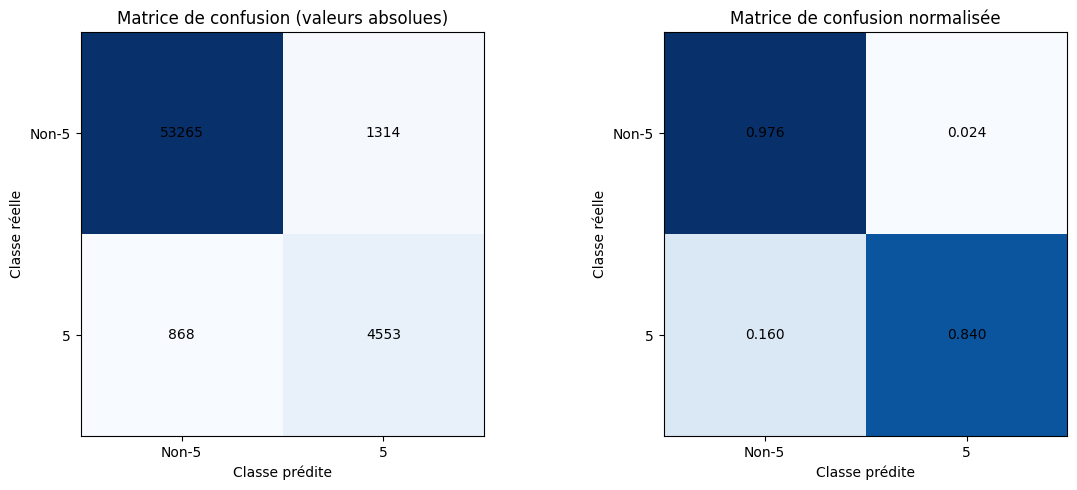


=== Interprétation de la matrice de confusion ===

Valeurs de la matrice (absolues):
• Vrais Négatifs (TN): 53265 - Correctement classés comme 'Non-5'
• Faux Positifs (FP): 1314 - Incorrectement classés comme '5' (Erreur Type I)
• Faux Négatifs (FN): 868 - Incorrectement classés comme 'Non-5' (Erreur Type II)
• Vrais Positifs (TP): 4553 - Correctement classés comme '5'

Pourcentages (normalisés):
• Spécificité (TN rate): 0.976 - 97.6% des 'Non-5' bien identifiés
• Taux FP (FP rate): 0.024 - 2.4% des 'Non-5' mal classés comme '5'
• Taux FN (FN rate): 0.160 - 16.0% des '5' mal classés comme 'Non-5'
• Sensibilité (TP rate): 0.840 - 84.0% des '5' bien identifiés


In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

print("=== Matrice de confusion du classifieur SGD ===\n")

# Calculer la matrice de confusion normale
cm = confusion_matrix(y_train_5, y_train_pred)
print("Matrice de confusion (valeurs absolues):")
print(cm)

# Calculer la matrice de confusion normalisée
cm_normalized = confusion_matrix(y_train_5, y_train_pred, normalize='true')
print("\nMatrice de confusion normalisée:")
print(cm_normalized)

# Visualisation des matrices de confusion avec matplotlib uniquement
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matrice de confusion absolue
im1 = axes[0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Matrice de confusion (valeurs absolues)')
axes[0].set_xlabel('Classe prédite')
axes[0].set_ylabel('Classe réelle')

# Ajouter les annotations manuellement
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[0].text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center", color="black")

# Ajouter les labels des axes
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Non-5', '5'])
axes[0].set_yticklabels(['Non-5', '5'])

# Matrice de confusion normalisée
im2 = axes[1].imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Matrice de confusion normalisée')
axes[1].set_xlabel('Classe prédite')
axes[1].set_ylabel('Classe réelle')

# Ajouter les annotations pour la matrice normalisée
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        axes[1].text(j, i, format(cm_normalized[i, j], '.3f'),
                    ha="center", va="center", color="black")

# Ajouter les labels des axes
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Non-5', '5'])
axes[1].set_yticklabels(['Non-5', '5'])

plt.tight_layout()
plt.show()

# Interprétation détaillée de la matrice de confusion
print("\n=== Interprétation de la matrice de confusion ===")
tn, fp, fn, tp = cm.ravel()

print(f"\nValeurs de la matrice (absolues):")
print(f"• Vrais Négatifs (TN): {tn} - Correctement classés comme 'Non-5'")
print(f"• Faux Positifs (FP): {fp} - Incorrectement classés comme '5' (Erreur Type I)")
print(f"• Faux Négatifs (FN): {fn} - Incorrectement classés comme 'Non-5' (Erreur Type II)")
print(f"• Vrais Positifs (TP): {tp} - Correctement classés comme '5'")

print(f"\nPourcentages (normalisés):")
print(f"• Spécificité (TN rate): {cm_normalized[0,0]:.3f} - {cm_normalized[0,0]*100:.1f}% des 'Non-5' bien identifiés")
print(f"• Taux FP (FP rate): {cm_normalized[0,1]:.3f} - {cm_normalized[0,1]*100:.1f}% des 'Non-5' mal classés comme '5'")
print(f"• Taux FN (FN rate): {cm_normalized[1,0]:.3f} - {cm_normalized[1,0]*100:.1f}% des '5' mal classés comme 'Non-5'")
print(f"• Sensibilité (TP rate): {cm_normalized[1,1]:.3f} - {cm_normalized[1,1]*100:.1f}% des '5' bien identifiés")


### 2-3- Précision et rappel

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("=== Calcul des métriques de performance avec sklearn.metrics ===\n")

# Calculer la précision
precision = precision_score(y_train_5, y_train_pred)
print(f"Précision (Precision): {precision:.4f}")

# Calculer le rappel
recall = recall_score(y_train_5, y_train_pred)
print(f"Rappel (Recall): {recall:.4f}")

# Calculer le score F1
f1 = f1_score(y_train_5, y_train_pred)
print(f"Score F1: {f1:.4f}")

print(f"\n=== Interprétation des résultats ===")

print(f"\n1. PRÉCISION = {precision:.4f} ({precision*100:.2f}%)")
print(f"   • Sur toutes les images que le modèle a classées comme '5',")
print(f"     {precision*100:.2f}% sont réellement des '5'")
print(f"   • {(1-precision)*100:.2f}% sont des faux positifs (erreurs)")

print(f"\n2. RAPPEL = {recall:.4f} ({recall*100:.2f}%)")
print(f"   • Sur toutes les vraies images de '5' dans la base,")
print(f"     le modèle en a détecté {recall*100:.2f}%")
print(f"   • Il a manqué {(1-recall)*100:.2f}% des vrais '5' (faux négatifs)")

print(f"\n3. SCORE F1 = {f1:.4f} ({f1*100:.2f}%)")
print(f"   • Moyenne harmonique entre précision et rappel")
print(f"   • Mesure équilibrée des performances globales")

print(f"\n=== Analyse comparative ===")
if precision > recall:
    print(f"✓ Précision > Rappel : Le modèle est plutôt conservateur")
    print(f"  → Il évite les faux positifs mais manque quelques vrais '5'")
elif recall > precision:
    print(f"✓ Rappel > Précision : Le modèle est plutôt libéral")
    print(f"  → Il détecte bien les '5' mais fait quelques erreurs en trop")
else:
    print(f"✓ Précision ≈ Rappel : Modèle équilibré")

# Évaluation globale
if f1 >= 0.8:
    print(f"\n🎯 CONCLUSION: Performances EXCELLENTES (F1 ≥ 80%)")
elif f1 >= 0.6:
    print(f"\n✅ CONCLUSION: Performances BONNES (F1 ≥ 60%)")
elif f1 >= 0.4:
    print(f"\n⚠️  CONCLUSION: Performances MOYENNES (F1 ≥ 40%)")
else:
    print(f"\n❌ CONCLUSION: Performances FAIBLES (F1 < 40%)")

=== Calcul des métriques de performance avec sklearn.metrics ===

Précision (Precision): 0.7760
Rappel (Recall): 0.8399
Score F1: 0.8067

=== Interprétation des résultats ===

1. PRÉCISION = 0.7760 (77.60%)
   • Sur toutes les images que le modèle a classées comme '5',
     77.60% sont réellement des '5'
   • 22.40% sont des faux positifs (erreurs)

2. RAPPEL = 0.8399 (83.99%)
   • Sur toutes les vraies images de '5' dans la base,
     le modèle en a détecté 83.99%
   • Il a manqué 16.01% des vrais '5' (faux négatifs)

3. SCORE F1 = 0.8067 (80.67%)
   • Moyenne harmonique entre précision et rappel
   • Mesure équilibrée des performances globales

=== Analyse comparative ===
✓ Rappel > Précision : Le modèle est plutôt libéral
  → Il détecte bien les '5' mais fait quelques erreurs en trop

🎯 CONCLUSION: Performances EXCELLENTES (F1 ≥ 80%)


In [16]:
from sklearn.model_selection import cross_val_predict
import numpy as np

print("=== Calcul des scores de décision avec cross_val_predict ===\n")

# Utiliser cross_val_predict avec method='decision_function' pour obtenir les scores
# Cette fonction retourne les scores de décision pour chaque échantillon lors de la validation croisée 3-fold
y_train_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method='decision_function')

print(f"Type des scores: {type(y_train_scores)}")
print(f"Forme des scores: {y_train_scores.shape}")
print(f"Type des éléments: {type(y_train_scores[0])}")

# Afficher quelques exemples de scores
print(f"\nPremiers 20 scores: {y_train_scores[:20]}")
print(f"Derniers 20 scores: {y_train_scores[-20:]}")

# Statistiques des scores
print(f"\n=== Statistiques des scores de décision ===")
print(f"Nombre total de scores: {len(y_train_scores)}")
print(f"Score minimum: {y_train_scores.min():.4f}")
print(f"Score maximum: {y_train_scores.max():.4f}")
print(f"Score moyen: {y_train_scores.mean():.4f}")
print(f"Écart-type: {y_train_scores.std():.4f}")

# Compter les scores positifs et négatifs (seuil par défaut = 0)
scores_positifs = np.sum(y_train_scores > 0)
scores_negatifs = np.sum(y_train_scores <= 0)

print(f"\n=== Répartition selon le seuil par défaut (0) ===")
print(f"Scores positifs (> 0): {scores_positifs} - Prédits comme '5'")
print(f"Scores négatifs (≤ 0): {scores_negatifs} - Prédits comme 'Non-5'")
print(f"Pourcentage de scores positifs: {(scores_positifs / len(y_train_scores) * 100):.2f}%")
print(f"Pourcentage de scores négatifs: {(scores_negatifs / len(y_train_scores) * 100):.2f}%")

# Comparaison avec les prédictions binaires précédentes
predictions_binaires = (y_train_scores > 0)
coherence = np.array_equal(predictions_binaires, y_train_pred)
print(f"\n=== Vérification de cohérence ===")
print(f"Les prédictions binaires (score > 0) correspondent aux prédictions précédentes: {coherence}")

print(f"\n=== Conclusion ===")
print("Les scores de décision permettent de comprendre la 'confiance' du modèle:")
print("• Plus le score est élevé, plus le modèle est confiant que c'est un '5'")
print("• Plus le score est faible (négatif), plus le modèle est confiant que ce n'est PAS un '5'")
print("• Le seuil par défaut de 0 sépare les deux classes")

=== Calcul des scores de décision avec cross_val_predict ===

Type des scores: <class 'numpy.ndarray'>
Forme des scores: (60000,)
Type des éléments: <class 'numpy.float64'>

Premiers 20 scores: [ -4623.91768182 -29346.42102807 -34236.70184275 -16138.71839177
 -21171.63889063 -22009.80344991 -14964.09692292 -26696.68263781
  -6819.04675803 -16964.3306227  -22432.720243     4412.72876249
 -32333.85710508 -20597.06268605  -8276.30040315 -17367.45521284
 -29269.23384584 -19067.33952242  -4755.35724385 -22693.61472589]
Derniers 20 scores: [ -6147.65113121 -15312.77185557  -9620.37637257 -26420.40769421
 -14148.43527715 -26976.56161717  -3968.54435326 -16082.07592535
 -13972.69019004  -8555.29681656 -15571.86317708  -9900.93296428
  -4133.63759523   6095.01731827  -5444.55339566 -12910.74832263
 -10589.39874089   6317.74072977  -9602.73377933  -9875.91846006]

=== Statistiques des scores de décision ===
Nombre total de scores: 60000
Score minimum: -133315.7300
Score maximum: 36765.4381
Score

=== Calcul des précisions, rappels et seuils avec precision_recall_curve ===

Nombre de seuils calculés: 60000
Nombre de valeurs de précision: 60001
Nombre de valeurs de rappel: 60001

=== Analyse des seuils ===
Seuil minimum: -133315.7300
Seuil maximum: 36765.4381
Premiers 10 seuils: [-133315.73000991 -128627.16177203 -120211.44750976 -117647.94028586
 -117646.74175979 -117013.48576985 -114717.78599486 -114508.12335627
 -114065.45351097 -113581.47813317]
Derniers 10 seuils: [28353.20710671 28483.68062929 28531.95014512 28559.86367441
 28687.45932799 28835.83098215 28877.6800515  31516.36497999
 36066.23752443 36765.43808511]

=== Analyse des précisions ===
Précision minimum: 0.0903
Précision maximum: 1.0000
Précision moyenne: 0.2834

=== Analyse des rappels ===
Rappel minimum: 0.0000
Rappel maximum: 1.0000
Rappel moyen: 0.9155


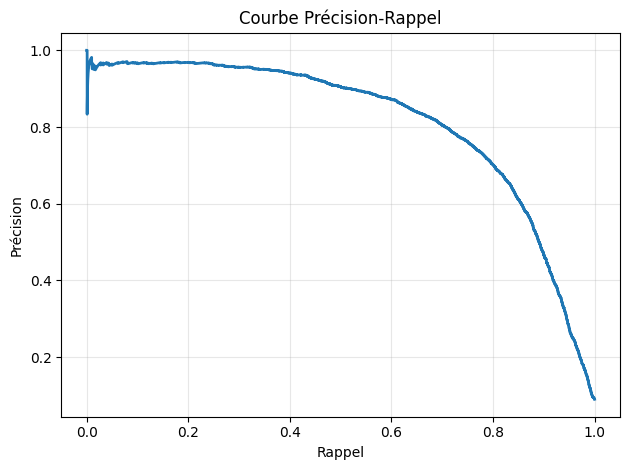


=== Analyse de points clés ===
Seuil optimal (F1 max): -1297.4468
  - Précision: 0.7622
  - Rappel: 0.7504
  - F1-score: 0.7563

Seuil par défaut (≈ 0):
  - Précision: 0.0903
  - Rappel: 1.0000
  - F1-score: 0.1657

=== Conclusion ===
La courbe précision-rappel montre le compromis entre précision et rappel:
• Seuil élevé → Précision élevée, Rappel faible (peu de faux positifs)
• Seuil faible → Précision faible, Rappel élevé (peu de faux négatifs)
• Le seuil optimal pour F1 est: -1297.4468


In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

print("=== Calcul des précisions, rappels et seuils avec precision_recall_curve ===\n")

# Calculer les précisions, rappels et seuils pour chaque instance
# Utilise les scores de décision calculés précédemment
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_scores)

print(f"Nombre de seuils calculés: {len(thresholds)}")
print(f"Nombre de valeurs de précision: {len(precisions)}")
print(f"Nombre de valeurs de rappel: {len(recalls)}")

print(f"\n=== Analyse des seuils ===")
print(f"Seuil minimum: {thresholds.min():.4f}")
print(f"Seuil maximum: {thresholds.max():.4f}")
print(f"Premiers 10 seuils: {thresholds[:10]}")
print(f"Derniers 10 seuils: {thresholds[-10:]}")

print(f"\n=== Analyse des précisions ===")
print(f"Précision minimum: {precisions.min():.4f}")
print(f"Précision maximum: {precisions.max():.4f}")
print(f"Précision moyenne: {precisions.mean():.4f}")

print(f"\n=== Analyse des rappels ===")
print(f"Rappel minimum: {recalls.min():.4f}")
print(f"Rappel maximum: {recalls.max():.4f}")
print(f"Rappel moyen: {recalls.mean():.4f}")

plt.plot(recalls, precisions, linewidth=2)
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Précision-Rappel")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse de points spécifiques
print(f"\n=== Analyse de points clés ===")

# Trouver le seuil optimal (F1-score maximum)
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])
f1_scores = np.nan_to_num(f1_scores)  # Remplacer NaN par 0
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precisions[optimal_idx]
optimal_recall = recalls[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"Seuil optimal (F1 max): {optimal_threshold:.4f}")
print(f"  - Précision: {optimal_precision:.4f}")
print(f"  - Rappel: {optimal_recall:.4f}")
print(f"  - F1-score: {optimal_f1:.4f}")

# Seuil par défaut (0)
default_idx = np.where(thresholds <= 0)[0]
if len(default_idx) > 0:
    default_idx = default_idx[0]
    default_precision = precisions[default_idx]
    default_recall = recalls[default_idx]
    default_f1 = 2 * (default_precision * default_recall) / (default_precision + default_recall)

    print(f"\nSeuil par défaut (≈ 0):")
    print(f"  - Précision: {default_precision:.4f}")
    print(f"  - Rappel: {default_recall:.4f}")
    print(f"  - F1-score: {default_f1:.4f}")

print(f"\n=== Conclusion ===")
print("La courbe précision-rappel montre le compromis entre précision et rappel:")
print("• Seuil élevé → Précision élevée, Rappel faible (peu de faux positifs)")
print("• Seuil faible → Précision faible, Rappel élevé (peu de faux négatifs)")
print(f"• Le seuil optimal pour F1 est: {optimal_threshold:.4f}")

# III- Apprentissage d'un classifieur multi-classes


## 1 - Apprentissage des données

In [18]:
from sklearn.linear_model import SGDClassifier

print("=== Apprentissage d'un classifieur SGD multi-classes ===\n")

# Création d'un objet SGDClassifier pour classification multi-classes
sgd_multiclass = SGDClassifier()

# Entraîner le modèle avec toutes les classes (Y_train au lieu de y_train_5)
sgd_multiclass.fit(X_train, Y_train)
print("Entraînement terminé")

# Afficher les informations sur le modèle
print(f"\n=== Informations sur le modèle multi-classes ===")
print(f"Classes apprises: {sgd_multiclass.classes_}")
print(f"Nombre de classes: {len(sgd_multiclass.classes_)}")

# Test de prédiction sur la première instance
print(f"\n=== Test de prédiction ===")
premiere_instance = X.iloc[0:1]
prediction_multiclass = sgd_multiclass.predict(premiere_instance)
vraie_classe = Y.iloc[0]

print(f"Vraie classe de la première instance: {vraie_classe}")
print(f"Prédiction du modèle multi-classes: {prediction_multiclass[0]}")
print(f"Prédiction correcte: {prediction_multiclass[0] == vraie_classe}")

# Obtenir les scores de décision pour toutes les classes
scores_decision = sgd_multiclass.decision_function(premiere_instance)
print(f"\nScores de décision pour chaque classe:")
for i, (classe, score) in enumerate(zip(sgd_multiclass.classes_, scores_decision[0])):
    marker = " ←" if classe == prediction_multiclass[0] else ""
    print(f"  Classe {classe}: {score:.4f}{marker}")

print(f"\n=== Conclusion ===")
print("Le modèle SGD a été entraîné avec succès pour classifier les 10 chiffres (0-9)")
print("Il peut maintenant prédire n'importe quel chiffre manuscrit du dataset MNIST")

=== Apprentissage d'un classifieur SGD multi-classes ===

Entraînement terminé

=== Informations sur le modèle multi-classes ===
Classes apprises: [0 1 2 3 4 5 6 7 8 9]
Nombre de classes: 10

=== Test de prédiction ===
Vraie classe de la première instance: 5
Prédiction du modèle multi-classes: 5
Prédiction correcte: True

Scores de décision pour chaque classe:
  Classe 0: -34247.2435
  Classe 1: -34038.0553
  Classe 2: -9402.6905
  Classe 3: -1112.1161
  Classe 4: -18693.7725
  Classe 5: 2899.9443 ←
  Classe 6: -26730.2695
  Classe 7: -23111.9520
  Classe 8: -6841.6073
  Classe 9: -13138.4632

=== Conclusion ===
Le modèle SGD a été entraîné avec succès pour classifier les 10 chiffres (0-9)
Il peut maintenant prédire n'importe quel chiffre manuscrit du dataset MNIST


## 2- Evaluation du modèle d'apprentissage sur les données d'apprentissage

### 2-1- Taux de classification

In [19]:
from sklearn.model_selection import cross_val_score

print("=== Évaluation du classifieur SGD multi-classes avec validation croisée ===\n")

# Utiliser cross_val_score avec 3-fold cross-validation sur le modèle multi-classes
# Évaluer avec toutes les classes (Y_train) au lieu de la classification binaire
scores_multiclass = cross_val_score(sgd_multiclass, X_train, Y_train, cv=3, scoring='accuracy')

# a. Afficher le taux de classification (accuracy) de chaque fold
for i, score in enumerate(scores_multiclass, 1):
    print(f"   Fold {i}: {score:.4f} ({score*100:.2f}%)")

# b. Afficher la moyenne des taux de classification
moyenne_accuracy = scores_multiclass.mean()
print(f"\nb. Moyenne des taux de classification: {moyenne_accuracy:.4f} ({moyenne_accuracy*100:.2f}%)")


=== Évaluation du classifieur SGD multi-classes avec validation croisée ===

   Fold 1: 0.8786 (87.86%)
   Fold 2: 0.8512 (85.12%)
   Fold 3: 0.8707 (87.07%)

b. Moyenne des taux de classification: 0.8668 (86.68%)


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

print("=== Amélioration avec StandardScaler ===\n")

# a. Instancier un objet de la classe StandardScaler
scaler = StandardScaler()

# b. Appliquer fit_transform sur les données d'apprentissage
X_train_scaled = scaler.fit_transform(X_train)
print(f"Forme des données standardisées: {X_train_scaled.shape}")

# c. Évaluer le classifieur SGD avec les données standardisées
scores_scaled = cross_val_score(sgd_multiclass, X_train_scaled, Y_train, cv=3, scoring='accuracy')

print("\nÉvaluation avec données standardisées:")
for i, score in enumerate(scores_scaled, 1):
    print(f"Fold {i}: {score:.4f} ({score*100:.2f}%)")

moyenne_scaled = scores_scaled.mean()
print(f"Moyenne: {moyenne_scaled:.4f} ({moyenne_scaled*100:.2f}%)")

# Comparaison avec les résultats précédents
print(f"\n=== Comparaison des résultats ===")
print(f"Sans standardisation: {moyenne_accuracy:.4f} ({moyenne_accuracy*100:.2f}%)")
print(f"Avec standardisation: {moyenne_scaled:.4f} ({moyenne_scaled*100:.2f}%)")

amelioration = moyenne_scaled - moyenne_accuracy
print(f"Amélioration: {amelioration:+.4f} ({amelioration*100:+.2f} points de %)")

if amelioration > 0:
    print("✅ Les résultats sont MEILLEURS avec la standardisation")
else:
    print("❌ Les résultats ne sont PAS meilleurs avec la standardisation")

=== Amélioration avec StandardScaler ===

Forme des données standardisées: (60000, 784)


c:\Users\BreizhHardware\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Évaluation avec données standardisées:
Fold 1: 0.8999 (89.98%)
Fold 2: 0.8994 (89.94%)
Fold 3: 0.8987 (89.87%)
Moyenne: 0.8993 (89.93%)

=== Comparaison des résultats ===
Sans standardisation: 0.8668 (86.68%)
Avec standardisation: 0.8993 (89.93%)
Amélioration: +0.0325 (+3.25 points de %)
✅ Les résultats sont MEILLEURS avec la standardisation


### 2-2- Matrice de confusion

=== Matrice de confusion du classifieur SGD multi-classes ===

Prédiction des classes avec cross_val_predict...
Forme des prédictions: (60000,)
Classes prédites uniques: [0 1 2 3 4 5 6 7 8 9]

a. Matrice de confusion (valeurs absolues) 10x10:
[[5622    2   42   25   13   55   65   14   35   50]
 [   3 6484   42   26   10   30   11   47   62   27]
 [  37   94 4879  273   64   90  166  125  167   63]
 [  18   33  125 5299   22  163   27   82  151  211]
 [  10   25   31   13 5154   39   93   40   66  371]
 [  60   31   45  340   79 4339  142   30  174  181]
 [  36   24   54   10   51   92 5590    2   43   16]
 [  21   31   58   23   60   21    5 5595   24  427]
 [  31  188  148  542   81  493   74   54 3695  545]
 [  27   27   13   83  196   53    3  287   36 5224]]

Matrice de confusion normalisée:
[[9.49181158e-01 3.37666723e-04 7.09100118e-03 4.22083404e-03
  2.19483370e-03 9.28583488e-03 1.09741685e-02 2.36366706e-03
  5.90916765e-03 8.44166807e-03]
 [4.44971818e-04 9.61732424e-01 6.2

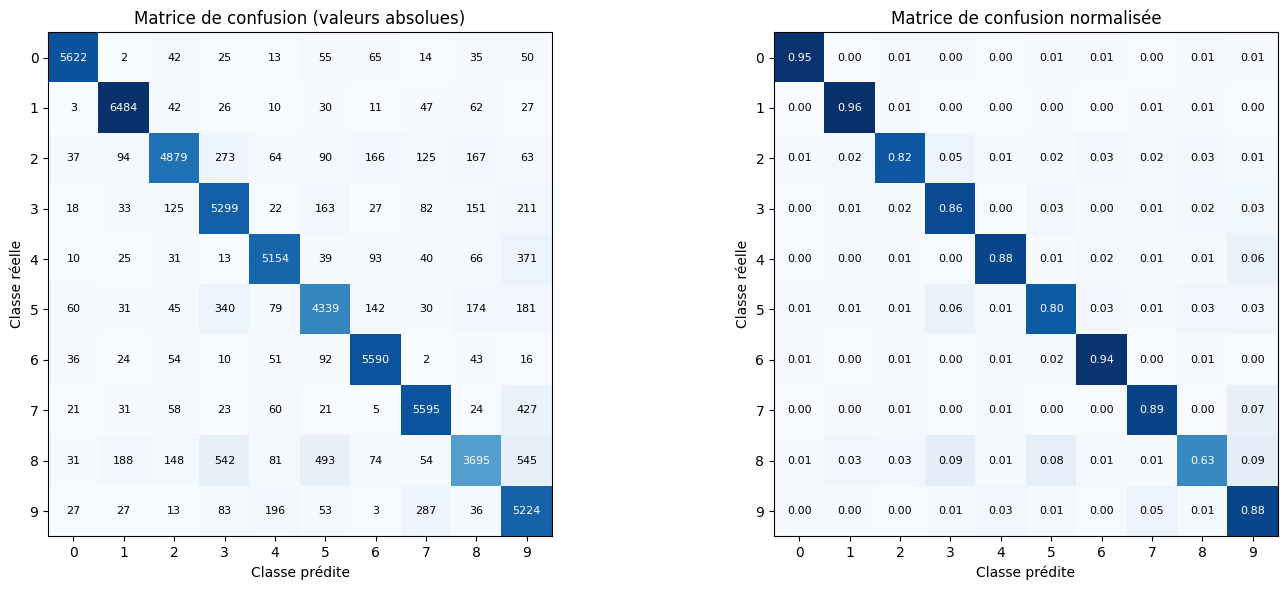


=== Interprétation des résultats ===

Accuracy globale: 0.8647 (86.47%)

Performances par classe (rappel):
  Classe 0: 0.949 (94.9%) - 5923 instances
  Classe 1: 0.962 (96.2%) - 6742 instances
  Classe 2: 0.819 (81.9%) - 5958 instances
  Classe 3: 0.864 (86.4%) - 6131 instances
  Classe 4: 0.882 (88.2%) - 5842 instances
  Classe 5: 0.800 (80.0%) - 5421 instances
  Classe 6: 0.945 (94.5%) - 5918 instances
  Classe 7: 0.893 (89.3%) - 6265 instances
  Classe 8: 0.632 (63.2%) - 5851 instances
  Classe 9: 0.878 (87.8%) - 5949 instances

Meilleures classes (rappel élevé):
  Classe 1: 0.962 (96.2%)
  Classe 0: 0.949 (94.9%)
  Classe 6: 0.945 (94.5%)

Pires classes (rappel faible):
  Classe 8: 0.632 (63.2%)
  Classe 5: 0.800 (80.0%)
  Classe 2: 0.819 (81.9%)

Erreurs les plus fréquentes:
  Classe 8 prédite comme 9: 545 fois
  Classe 8 prédite comme 3: 542 fois
  Classe 8 prédite comme 5: 493 fois
  Classe 7 prédite comme 9: 427 fois
  Classe 4 prédite comme 9: 371 fois

=== Conclusion ===
La 

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

print("=== Matrice de confusion du classifieur SGD multi-classes ===\n")

# Prédire les classes avec cross_val_predict pour le modèle multi-classes
print("Prédiction des classes avec cross_val_predict...")
y_train_pred_multiclass = cross_val_predict(sgd_multiclass, X_train, Y_train, cv=3)

print(f"Forme des prédictions: {y_train_pred_multiclass.shape}")
print(f"Classes prédites uniques: {np.unique(y_train_pred_multiclass)}")

# a. Calculer la matrice de confusion normale et normalisée
cm_multiclass = confusion_matrix(Y_train, y_train_pred_multiclass)
print("\na. Matrice de confusion (valeurs absolues) 10x10:")
print(cm_multiclass)

cm_normalized_multiclass = confusion_matrix(Y_train, y_train_pred_multiclass, normalize='true')
print("\nMatrice de confusion normalisée:")
print(cm_normalized_multiclass)

# Visualisation des matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matrice de confusion absolue
im1 = axes[0].imshow(cm_multiclass, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Matrice de confusion (valeurs absolues)')
axes[0].set_xlabel('Classe prédite')
axes[0].set_ylabel('Classe réelle')

# Ajouter les annotations pour les valeurs
for i in range(10):
    for j in range(10):
        axes[0].text(j, i, format(cm_multiclass[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm_multiclass[i, j] > cm_multiclass.max()/2 else "black",
                    fontsize=8)

axes[0].set_xticks(range(10))
axes[0].set_yticks(range(10))
axes[0].set_xticklabels(range(10))
axes[0].set_yticklabels(range(10))

# Matrice de confusion normalisée
im2 = axes[1].imshow(cm_normalized_multiclass, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Matrice de confusion normalisée')
axes[1].set_xlabel('Classe prédite')
axes[1].set_ylabel('Classe réelle')

# Ajouter les annotations pour les pourcentages
for i in range(10):
    for j in range(10):
        axes[1].text(j, i, format(cm_normalized_multiclass[i, j], '.2f'),
                    ha="center", va="center",
                    color="white" if cm_normalized_multiclass[i, j] > 0.5 else "black",
                    fontsize=8)

axes[1].set_xticks(range(10))
axes[1].set_yticks(range(10))
axes[1].set_xticklabels(range(10))
axes[1].set_yticklabels(range(10))

plt.tight_layout()
plt.show()

# b. Interprétation des résultats
print("\n=== Interprétation des résultats ===")

# Calcul des métriques globales
accuracy_total = np.trace(cm_multiclass) / np.sum(cm_multiclass)
print(f"\nAccuracy globale: {accuracy_total:.4f} ({accuracy_total*100:.2f}%)")

# Analyse par classe (diagonale = bonnes prédictions)
print(f"\nPerformances par classe (rappel):")
for i in range(10):
    rappel_classe = cm_normalized_multiclass[i, i]
    nb_instances = cm_multiclass[i, :].sum()
    print(f"  Classe {i}: {rappel_classe:.3f} ({rappel_classe*100:.1f}%) - {nb_instances} instances")

# Classes les mieux classées
diagonale = np.diag(cm_normalized_multiclass)
meilleures_classes = np.argsort(diagonale)[::-1][:3]
pires_classes = np.argsort(diagonale)[:3]

print(f"\nMeilleures classes (rappel élevé):")
for classe in meilleures_classes:
    print(f"  Classe {classe}: {diagonale[classe]:.3f} ({diagonale[classe]*100:.1f}%)")

print(f"\nPires classes (rappel faible):")
for classe in pires_classes:
    print(f"  Classe {classe}: {diagonale[classe]:.3f} ({diagonale[classe]*100:.1f}%)")

# Erreurs les plus fréquentes (hors diagonale)
cm_erreurs = cm_multiclass.copy()
np.fill_diagonal(cm_erreurs, 0)  # Enlever la diagonale
erreurs_max = np.unravel_index(np.argmax(cm_erreurs), cm_erreurs.shape)

print(f"\nErreurs les plus fréquentes:")
indices_erreurs = np.argsort(cm_erreurs.ravel())[::-1][:5]
for idx in indices_erreurs:
    i, j = np.unravel_index(idx, cm_erreurs.shape)
    if cm_erreurs[i, j] > 0:
        print(f"  Classe {i} prédite comme {j}: {cm_erreurs[i, j]} fois")

print(f"\n=== Conclusion ===")
print("La matrice 10x10 montre les performances du classifieur sur les 10 chiffres.")
print("La diagonale représente les bonnes classifications.")
print("Les valeurs hors diagonale montrent les confusions entre classes.")

=== Affichage de la matrice de confusion avec matshow ===



<Figure size 1000x800 with 0 Axes>

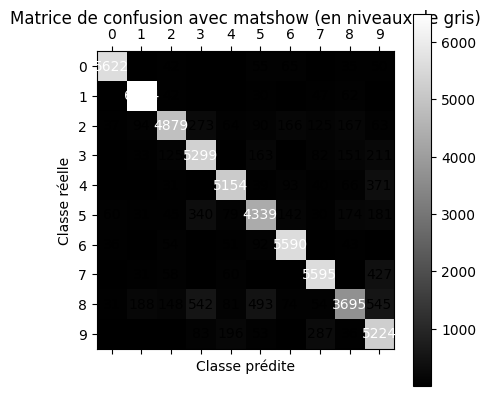

=== Analyse de la confusion entre les classes 5 et 8 ===

Confusion 5 → 8: 174 instances (3.2% des vrais 5)
Confusion 8 → 5: 493 instances (8.4% des vrais 8)
Performance de la classe 5: 0.800 (80.0%)
Performance de la classe 8: 0.632 (63.2%)

=== Pourquoi la classe 5 est-elle confondue avec le chiffre 8 ? ===

RAISONS PROBABLES DE LA CONFUSION 5 ↔ 8:

1. SIMILARITÉ MORPHOLOGIQUE:
   • Les chiffres 5 et 8 partagent des caractéristiques visuelles similaires
   • Courbes fermées et boucles dans les deux chiffres
   • Segments horizontaux en haut et au milieu

2. VARIABILITÉ DE L'ÉCRITURE MANUSCRITE:
   • Un '5' mal écrit peut ressembler à un '8' ouvert
   • Un '8' déformé peut être confondu avec un '5'
   • Variations dans l'épaisseur des traits et la fermeture des boucles

3. QUALITÉ DES DONNÉES:
   • Images de résolution 28x28 pixels (faible résolution)
   • Possibles artéfacts de numérisation
   • Variations de contraste et de netteté



In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

print("=== Affichage de la matrice de confusion avec matshow ===\n")

# Affichage de la matrice de confusion avec matshow
plt.figure(figsize=(10, 8))
plt.matshow(cm_multiclass, cmap=mpl.cm.gray)
plt.title('Matrice de confusion avec matshow (en niveaux de gris)', pad=20)
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')

# Ajouter les annotations des valeurs
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(cm_multiclass[i, j]),
                ha="center", va="center",
                color="white" if cm_multiclass[i, j] > cm_multiclass.max()/2 else "black",
                fontsize=10)

# Ajouter les ticks et labels
plt.xticks(range(10))
plt.yticks(range(10))
plt.colorbar()
plt.show()

print("=== Analyse de la confusion entre les classes 5 et 8 ===\n")

# Analyser spécifiquement la confusion entre 5 et 8
confusion_5_vers_8 = cm_multiclass[5, 8]  # Classe 5 prédite comme 8
confusion_8_vers_5 = cm_multiclass[8, 5]  # Classe 8 prédite comme 5
total_5 = np.sum(cm_multiclass[5, :])     # Total d'instances de classe 5
total_8 = np.sum(cm_multiclass[8, :])     # Total d'instances de classe 8

print(f"Confusion 5 → 8: {confusion_5_vers_8} instances ({confusion_5_vers_8/total_5*100:.1f}% des vrais 5)")
print(f"Confusion 8 → 5: {confusion_8_vers_5} instances ({confusion_8_vers_5/total_8*100:.1f}% des vrais 8)")

# Performance de la classe 5
performance_5 = cm_multiclass[5, 5] / total_5
print(f"Performance de la classe 5: {performance_5:.3f} ({performance_5*100:.1f}%)")

# Performance de la classe 8
performance_8 = cm_multiclass[8, 8] / total_8
print(f"Performance de la classe 8: {performance_8:.3f} ({performance_8*100:.1f}%)")

print(f"\n=== Pourquoi la classe 5 est-elle confondue avec le chiffre 8 ? ===")
print(f"""
RAISONS PROBABLES DE LA CONFUSION 5 ↔ 8:

1. SIMILARITÉ MORPHOLOGIQUE:
   • Les chiffres 5 et 8 partagent des caractéristiques visuelles similaires
   • Courbes fermées et boucles dans les deux chiffres
   • Segments horizontaux en haut et au milieu

2. VARIABILITÉ DE L'ÉCRITURE MANUSCRITE:
   • Un '5' mal écrit peut ressembler à un '8' ouvert
   • Un '8' déformé peut être confondu avec un '5'
   • Variations dans l'épaisseur des traits et la fermeture des boucles

3. QUALITÉ DES DONNÉES:
   • Images de résolution 28x28 pixels (faible résolution)
   • Possibles artéfacts de numérisation
   • Variations de contraste et de netteté
""")

=== Analyse des erreurs de classification ===

Matrice de confusion avec diagonale remplacée par des 0:
[[  0   2  42  25  13  55  65  14  35  50]
 [  3   0  42  26  10  30  11  47  62  27]
 [ 37  94   0 273  64  90 166 125 167  63]
 [ 18  33 125   0  22 163  27  82 151 211]
 [ 10  25  31  13   0  39  93  40  66 371]
 [ 60  31  45 340  79   0 142  30 174 181]
 [ 36  24  54  10  51  92   0   2  43  16]
 [ 21  31  58  23  60  21   5   0  24 427]
 [ 31 188 148 542  81 493  74  54   0 545]
 [ 27  27  13  83 196  53   3 287  36   0]]


<Figure size 1200x1000 with 0 Axes>

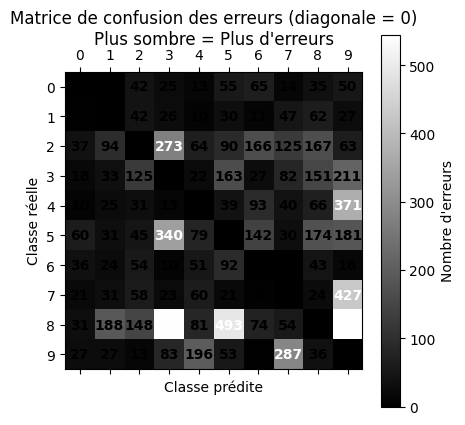

Erreurs de la classe 8 (vrais 8 mal classés):
  8 → 0: 31 erreurs
  8 → 1: 188 erreurs
  8 → 2: 148 erreurs
  8 → 3: 542 erreurs
  8 → 4: 81 erreurs
  8 → 5: 493 erreurs
  8 → 6: 74 erreurs
  8 → 7: 54 erreurs
  8 → 9: 545 erreurs

Erreurs vers la classe 8 (mal classés comme 8):
  0 → 8: 35 erreurs
  1 → 8: 62 erreurs
  2 → 8: 167 erreurs
  3 → 8: 151 erreurs
  4 → 8: 66 erreurs
  5 → 8: 174 erreurs
  6 → 8: 43 erreurs
  7 → 8: 24 erreurs
  9 → 8: 36 erreurs

Statistiques classe 8:
• Total erreurs sortantes (8 mal classé): 2156
• Total erreurs entrantes (mal classé comme 8): 758
• Classe 8 semble problématique

OBSERVATION sur la classe 8:
La classe 8 génère plus d'erreurs qu'elle n'en attire
Confusion mutuelle entre 3 et 5:
• 3 -> 5: 163 erreurs
• 5 -> 3: 340 erreurs
• Total confusion 3 et 5: 503 erreurs

Pourcentages d'erreur:
• 2.7% des vrais 3 sont confondus avec 5
• 6.3% des vrais 5 sont confondus avec 3

Pourquoi une forte confusion entre 3 et 5 ?

RAISONS PROBABLES DE LA CONFUSI

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

print("=== Analyse des erreurs de classification ===\n")

# Créer une copie de la matrice de confusion pour les erreurs
cm_erreurs = cm_multiclass.copy()

# Remplacer la diagonale par des 0 pour se concentrer sur les erreurs
np.fill_diagonal(cm_erreurs, 0)
print("Matrice de confusion avec diagonale remplacée par des 0:")
print(cm_erreurs)

# Affichage de la matrice d'erreurs avec matshow
plt.figure(figsize=(12, 10))
plt.matshow(cm_erreurs, cmap=mpl.cm.gray)
plt.title('Matrice de confusion des erreurs (diagonale = 0)\nPlus sombre = Plus d\'erreurs', pad=20)
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')

# Ajouter les annotations des valeurs
for i in range(10):
    for j in range(10):
        if cm_erreurs[i, j] > 0:  # Afficher seulement les valeurs non nulles
            plt.text(j, i, str(cm_erreurs[i, j]),
                    ha="center", va="center",
                    color="white" if cm_erreurs[i, j] > cm_erreurs.max()/2 else "black",
                    fontsize=10, fontweight='bold')

# Ajouter les ticks et labels
plt.xticks(range(10))
plt.yticks(range(10))
plt.colorbar(label='Nombre d\'erreurs')
plt.show()

# a. Analyse de la classe 8

# Analyser les erreurs de la classe 8
erreurs_classe_8_reelle = cm_erreurs[8, :]  # Classe 8 prédite comme autre chose
erreurs_vers_classe_8 = cm_erreurs[:, 8]    # Autres classes prédites comme 8

print(f"Erreurs de la classe 8 (vrais 8 mal classés):")
for j in range(10):
    if erreurs_classe_8_reelle[j] > 0:
        print(f"  8 → {j}: {erreurs_classe_8_reelle[j]} erreurs")

print(f"\nErreurs vers la classe 8 (mal classés comme 8):")
for i in range(10):
    if erreurs_vers_classe_8[i] > 0:
        print(f"  {i} → 8: {erreurs_vers_classe_8[i]} erreurs")

# Statistiques sur la classe 8
total_erreurs_8_sortantes = np.sum(erreurs_classe_8_reelle)
total_erreurs_8_entrantes = np.sum(erreurs_vers_classe_8)
print(f"\nStatistiques classe 8:")
print(f"• Total erreurs sortantes (8 mal classé): {total_erreurs_8_sortantes}")
print(f"• Total erreurs entrantes (mal classé comme 8): {total_erreurs_8_entrantes}")
print(f"• Classe 8 semble {'problématique' if total_erreurs_8_entrantes > 100 else 'correcte'}")

print(f"\nOBSERVATION sur la classe 8:")
if total_erreurs_8_entrantes > total_erreurs_8_sortantes:
    print("La classe 8 attire beaucoup d'erreurs : d'autres chiffres sont souvent confondus avec 8")
    print("Cela suggère que le modèle a tendance à 'sur-prédire' la classe 8")
else:
    print("La classe 8 génère plus d'erreurs qu'elle n'en attire")

# Analyse de la confusion entre les classes 3 et 5

# Analyser spécifiquement la confusion 3 et 5
confusion_3_vers_5 = cm_erreurs[3, 5]  # Classe 3 prédite comme 5
confusion_5_vers_3 = cm_erreurs[5, 3]  # Classe 5 prédite comme 3

print(f"Confusion mutuelle entre 3 et 5:")
print(f"• 3 -> 5: {confusion_3_vers_5} erreurs")
print(f"• 5 -> 3: {confusion_5_vers_3} erreurs")
print(f"• Total confusion 3 et 5: {confusion_3_vers_5 + confusion_5_vers_3} erreurs")

# Calculer les totaux pour chaque classe
total_3 = np.sum(cm_multiclass[3, :])
total_5 = np.sum(cm_multiclass[5, :])

print(f"\nPourcentages d'erreur:")
print(f"• {confusion_3_vers_5/total_3*100:.1f}% des vrais 3 sont confondus avec 5")
print(f"• {confusion_5_vers_3/total_5*100:.1f}% des vrais 5 sont confondus avec 3")

print(f"\nPourquoi une forte confusion entre 3 et 5 ?")
print(f"""
RAISONS PROBABLES DE LA CONFUSION 3 ↔ 5:

1. SIMILARITÉ STRUCTURELLE:
   • Même orientation générale (ouverture vers la droite)
   • Présence de courbes dans la partie supérieure
   • Segments horizontaux similaires

2. VARIATIONS D'ÉCRITURE MANUSCRITE:
   • Un '3' avec boucles fermées peut ressembler à un '5'
   • Un '5' avec courbe arrondie peut ressembler à un '3'
   • Épaisseur variable des traits

3. RÉSOLUTION LIMITÉE (28x28 pixels):
   • Perte de détails fins qui distinguent 3 et 5
   • Lissage qui peut faire disparaître certaines caractéristiques
   • Artéfacts de pixellisation
""")

# IV- Classification multi-label

In [24]:
import numpy as np

print("=== Création d'un vecteur multi-label ===\n")

# a. Stocker True si les labels sont supérieurs à 7, False sinon
labels_sup_7 = (Y_train > 7)
print(f"Type: {type(labels_sup_7)}")
print(f"Forme: {labels_sup_7.shape}")
print(f"Exemples (premiers 20): {labels_sup_7.iloc[:20].values}")

# Statistiques
nb_sup_7 = np.sum(labels_sup_7)
print(f"Nombre de labels > 7: {nb_sup_7}")
print(f"Pourcentage: {(nb_sup_7 / len(Y_train) * 100):.2f}%")

# b. Stocker True si les labels sont impairs, False sinon
labels_impairs = (Y_train % 2 == 1)
print(f"Type: {type(labels_impairs)}")
print(f"Forme: {labels_impairs.shape}")
print(f"Exemples (premiers 20): {labels_impairs.iloc[:20].values}")

# Statistiques
nb_impairs = np.sum(labels_impairs)
print(f"Nombre de labels impairs: {nb_impairs}")
print(f"Pourcentage: {(nb_impairs / len(Y_train) * 100):.2f}%")

# c. Concaténer les deux vecteurs avec numpy.c_
vecteur_multilabel = np.c_[labels_sup_7, labels_impairs]
print(f"Type: {type(vecteur_multilabel)}")
print(f"Forme: {vecteur_multilabel.shape}")
print(f"Premières 20 lignes:")
print("[Sup_7, Impair]")
for i in range(20):
    sup7 = vecteur_multilabel[i, 0]
    impair = vecteur_multilabel[i, 1]
    label_original = Y_train.iloc[i]
    print(f"[{sup7:5}, {impair:5}] - Label original: {label_original}")


=== Création d'un vecteur multi-label ===

Type: <class 'pandas.core.series.Series'>
Forme: (60000,)
Exemples (premiers 20): [False False False False  True False False False False False False False
 False False False False False  True False  True]
Nombre de labels > 7: 11800
Pourcentage: 19.67%
Type: <class 'pandas.core.series.Series'>
Forme: (60000,)
Exemples (premiers 20): [ True False False  True  True False  True  True  True False  True  True
  True False  True  True False False False  True]
Nombre de labels impairs: 30508
Pourcentage: 50.85%
Type: <class 'numpy.ndarray'>
Forme: (60000, 2)
Premières 20 lignes:
[Sup_7, Impair]
[    0,     1] - Label original: 5
[    0,     0] - Label original: 0
[    0,     0] - Label original: 4
[    0,     1] - Label original: 1
[    1,     1] - Label original: 9
[    0,     0] - Label original: 2
[    0,     1] - Label original: 1
[    0,     1] - Label original: 3
[    0,     1] - Label original: 1
[    0,     0] - Label original: 4
[    0,     

In [25]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

print("=== Classification multi-label avec K-plus proches voisins ===\n")

# a. Créer un objet de la classe KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
print(f"- Nombre de voisins (n_neighbors): {knn_classifier.n_neighbors}")
print(f"- Métrique de distance: {knn_classifier.metric}")
print(f"- Algorithme: {knn_classifier.algorithm}")

# b. Appliquer la méthode fit avec la base d'apprentissage et le vecteur multi-label
print(f"- Données d'entraînement: {X_train.shape}")
print(f"- Vecteur multi-label: {vecteur_multilabel.shape}")

knn_classifier.fit(X_train, vecteur_multilabel)
print("Entraînement terminé avec succès")

# c. Prédire la classe de la première instance

# Extraire la première instance
premiere_instance = X.iloc[0:1]  # Garder la forme 2D
print(f"- Forme de la première instance: {premiere_instance.shape}")

# Effectuer la prédiction
prediction_multilabel = knn_classifier.predict(premiere_instance)
print(f"- Forme de la prédiction: {prediction_multilabel.shape}")
print(f"- Type de la prédiction: {type(prediction_multilabel)}")

# Analyser la prédiction
pred_sup_7 = prediction_multilabel[0, 0]  # Premier label (> 7)
pred_impair = prediction_multilabel[0, 1]  # Deuxième label (impair)

print(f"\n=== Résultat de la prédiction ===")
print(f"Prédiction multi-label: [{pred_sup_7}, {pred_impair}]")
print(f"   - Supérieur à 7: {pred_sup_7}")
print(f"   - Impair: {pred_impair}")

# Vérifier avec la vraie classe
vraie_classe = Y.iloc[0]
vraie_sup_7 = vraie_classe > 7
vraie_impair = vraie_classe % 2 == 1

print(f"\n=== Comparaison avec la réalité ===")
print(f"Vraie classe: {vraie_classe}")
print(f"Vraies caractéristiques: [{vraie_sup_7}, {vraie_impair}]")
print(f"   - Vraiment supérieur à 7: {vraie_sup_7}")
print(f"   - Vraiment impair: {vraie_impair}")

# Vérifier la correction de la prédiction
correction_sup_7 = (pred_sup_7 == vraie_sup_7)
correction_impair = (pred_impair == vraie_impair)
prediction_totalement_correcte = correction_sup_7 and correction_impair

print(f"\n=== Évaluation de la prédiction ===")
print(f"Prédiction 'Supérieur à 7': {'Correcte' if correction_sup_7 else 'Incorrecte'}")
print(f"Prédiction 'Impair': {'Correcte' if correction_impair else 'Incorrecte'}")
print(f"Prédiction globale: {'TOTALEMENT CORRECTE' if prediction_totalement_correcte else 'PARTIELLEMENT/TOTALEMENT INCORRECTE'}")

# Analyse détaillée
print(f"\n=== Interprétation ===")
if vraie_classe <= 7:
    if vraie_classe % 2 == 1:
        print(f"Le chiffre {vraie_classe} est un chiffre impair ≤ 7")
        interpretation = "[False, True]"
    else:
        print(f"Le chiffre {vraie_classe} est un chiffre pair ≤ 7")
        interpretation = "[False, False]"
else:
    if vraie_classe % 2 == 1:
        print(f"Le chiffre {vraie_classe} est un chiffre impair > 7")
        interpretation = "[True, True]"
    else:
        print(f"Le chiffre {vraie_classe} est un chiffre pair > 7")
        interpretation = "[True, False]"

print(f"Attendu: {interpretation}")
print(f"Prédit: [{pred_sup_7}, {pred_impair}]")

if prediction_totalement_correcte:
    print("Le modèle KNN a correctement identifié les deux caractéristiques multi-label!")
else:
    print("Le modèle KNN n'a pas parfaitement prédit toutes les caractéristiques.")


=== Classification multi-label avec K-plus proches voisins ===

- Nombre de voisins (n_neighbors): 5
- Métrique de distance: minkowski
- Algorithme: auto
- Données d'entraînement: (60000, 784)
- Vecteur multi-label: (60000, 2)
Entraînement terminé avec succès
- Forme de la première instance: (1, 784)
- Forme de la prédiction: (1, 2)
- Type de la prédiction: <class 'numpy.ndarray'>

=== Résultat de la prédiction ===
Prédiction multi-label: [False, True]
   - Supérieur à 7: False
   - Impair: True

=== Comparaison avec la réalité ===
Vraie classe: 5
Vraies caractéristiques: [False, True]
   - Vraiment supérieur à 7: False
   - Vraiment impair: True

=== Évaluation de la prédiction ===
Prédiction 'Supérieur à 7': Correcte
Prédiction 'Impair': Correcte
Prédiction globale: TOTALEMENT CORRECTE

=== Interprétation ===
Le chiffre 5 est un chiffre impair ≤ 7
Attendu: [False, True]
Prédit: [False, True]
Le modèle KNN a correctement identifié les deux caractéristiques multi-label!


# V- Classification multi-output

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

print("=== Ajout de bruit aux images d'apprentissage ===\n")

# a. Créer un vecteur de bruit
noise_train = np.random.randint(0, 100, (len(X_train), 784))

# b. Ajouter ce bruit avec une simple addition à la base d'apprentissage
print(f"\n Addition du bruit à la base d'apprentissage...")

# Effectuer l'addition
X_train_noisy = X_train.values + noise_train  # Utiliser .values pour obtenir numpy array


=== Ajout de bruit aux images d'apprentissage ===


 Addition du bruit à la base d'apprentissage...


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

print("=== Ajout de bruit aux images d'apprentissage ===\n")

# a. Créer un vecteur de bruit
noise_test = np.random.randint(0, 100, (len(X_test), 784))

# b. Ajouter ce bruit avec une simple addition à la base de test
print(f"\n Addition du bruit à la base de test...")

# Effectuer l'addition
X_test_noisy = X_test.values + noise_test


=== Ajout de bruit aux images d'apprentissage ===


 Addition du bruit à la base de test...


=== Labels pour les images bruitées créés ===
Forme de y_train_noisy: (60000, 784)
Forme de y_test_noisy: (10000, 784)

=== Affichage d'une image bruitée et de sa version non-bruitée ===


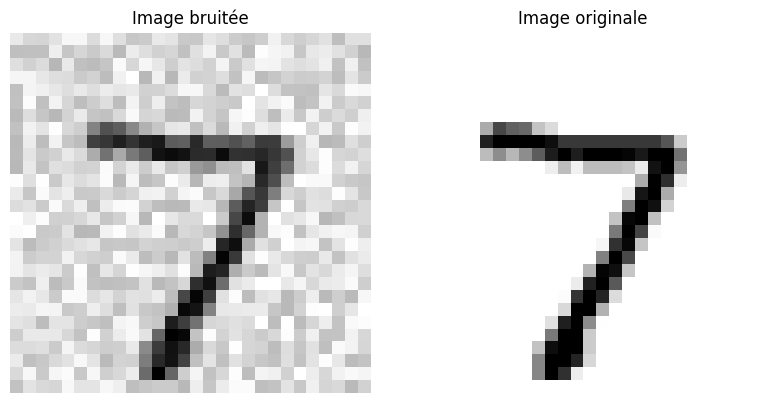

Affichage terminé.


In [28]:
# 49. Créez une variable qui va contenir les labels de la base d'apprentissage, à savoir les images d'apprentissage non bruitées
y_train_noisy = X_train.values

# 50. Créez une variable qui va contenir les labels de la base de test, à savoir les images de test non bruitées
y_test_noisy = X_test.values

print("=== Labels pour les images bruitées créés ===")
print(f"Forme de y_train_noisy: {y_train_noisy.shape}")
print(f"Forme de y_test_noisy: {y_test_noisy.shape}")

# 51. Affichez une image bruitée ainsi que sa version non-bruitée
print("\n=== Affichage d'une image bruitée et de sa version non-bruitée ===")

# X_test_noisy contient la base de test bruitée (créée précédemment)
some_digit = X_test_noisy[0]
# y_test_noisy contient les labels de la base de test (images de test non bruitée)
y_some_digit = y_test_noisy[0]

some_digit_image = some_digit.reshape(28, 28)
y_some_digit_image = y_some_digit.reshape(28, 28)

plt.figure(figsize=(8, 4)) # Ajuster la taille de la figure
plt.subplot(121)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.title("Image bruitée") # Ajouter un titre
plt.axis("off")

plt.subplot(122)
plt.imshow(y_some_digit_image, cmap=mpl.cm.binary)
plt.title("Image originale") # Ajouter un titre
plt.axis("off")

plt.tight_layout() # Ajuster l'espacement
plt.show()

print("Affichage terminé.")

=== Apprentissage et débruitage avec KNeighborsClassifier ===

- Nombre de voisins (n_neighbors): 5

Entraînement du débruiteur sur les données bruitées...
- Données d'entraînement bruitées: (60000, 784)
- Labels (images originales): (60000, 784)
Entraînement terminé avec succès

Prédiction de la première instance de test bruitée...
- Forme de l'instance test bruitée: (1, 784)
- Forme du vecteur d'image débruitée: (1, 784)
- Type du vecteur: <class 'numpy.ndarray'>

i. Valeurs du vecteur d'image débruitée (premiers 20): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   Valeurs du vecteur d'image débruitée (derniers 20): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

ii. Affichage de l'image débruitée et de l'image originale...
- Forme de l'image débruitée 2D: (28, 28)
- Forme de l'image originale 2D: (28, 28)


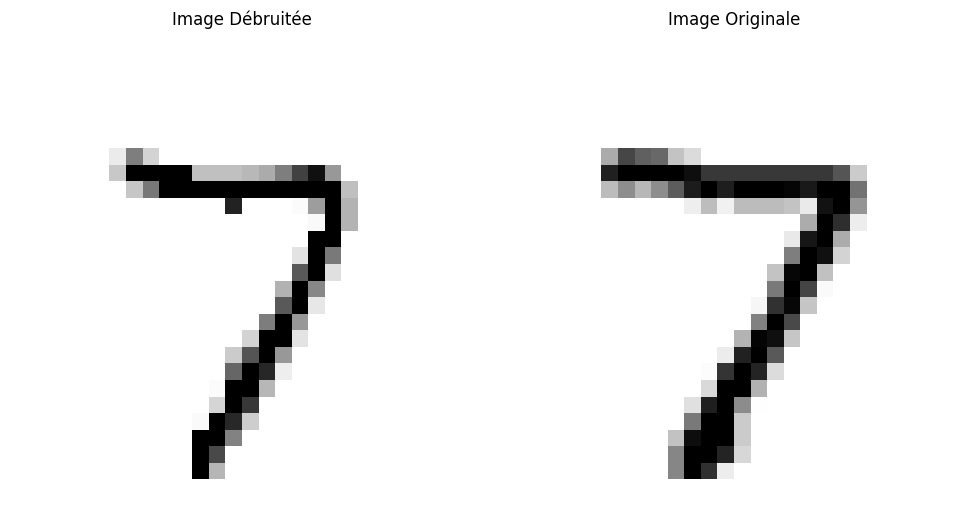


=== Conclusion ===
L'image bruitée de la base de test a été traitée par le débruiteur K-NN.
La version prédite (débruitée) est affichée à gauche et l'image originale à droite.


In [29]:
from sklearn.neighbors import KNeighborsClassifier

print("=== Apprentissage et débruitage avec KNeighborsClassifier ===\n")

# a. Créer un objet de la classe KNeighborsClassifier (utiliser les paramètres par défaut)
knn_denoiser = KNeighborsClassifier()
print(f"- Nombre de voisins (n_neighbors): {knn_denoiser.n_neighbors}")

# Appliquer la méthode fit avec les images d'apprentissage bruitées et leurs versions non-bruitées
print(f"\nEntraînement du débruiteur sur les données bruitées...")
print(f"- Données d'entraînement bruitées: {X_train_noisy.shape}")
print(f"- Labels (images originales): {y_train_noisy.shape}")

knn_denoiser.fit(X_train_noisy, y_train_noisy)
print("Entraînement terminé avec succès")

# b. Prédire la classe (sous forme de vecteurs) de la première instance de la base de test.
print("\nPrédiction de la première instance de test bruitée...")

# Extraire la première instance de la base de test bruitée
instance_test_bruit = X_test_noisy[0:1] # Garder la forme 2D
print(f"- Forme de l'instance test bruitée: {instance_test_bruit.shape}")

# Effectuer la prédiction (débruitage)
image_debruitee_vector = knn_denoiser.predict(instance_test_bruit)
print(f"- Forme du vecteur d'image débruitée: {image_debruitee_vector.shape}")
print(f"- Type du vecteur: {type(image_debruitee_vector)}")

# i. Afficher les valeurs du vecteur
print(f"\ni. Valeurs du vecteur d'image débruitée (premiers 20): {image_debruitee_vector[0, :20]}")
print(f"   Valeurs du vecteur d'image débruitée (derniers 20): {image_debruitee_vector[0, -20:]}")


# ii. Afficher ce vecteur sous-forme d'image
print("\nii. Affichage de l'image débruitée et de l'image originale...")

# Redimensionner le vecteur prédit en image 28x28
image_debruitee_2d = image_debruitee_vector.reshape(28, 28)
print(f"- Forme de l'image débruitée 2D: {image_debruitee_2d.shape}")

# Obtenir l'image originale correspondante pour comparaison
image_originale_test_2d = y_test_noisy[0].reshape(28, 28)
print(f"- Forme de l'image originale 2D: {image_originale_test_2d.shape}")


# Afficher les images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_debruitee_2d, cmap=mpl.cm.binary)
plt.title("Image Débruitée")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_originale_test_2d, cmap=mpl.cm.binary)
plt.title("Image Originale")
plt.axis("off")

plt.tight_layout()
plt.show()

print("\n=== Conclusion ===")
print("L'image bruitée de la base de test a été traitée par le débruiteur K-NN.")
print("La version prédite (débruitée) est affichée à gauche et l'image originale à droite.")